# 📊 Preprocessing Dataset Cataract Detection (ODIR-5K)

Notebook ini berisi tahapan preprocessing dataset citra fundus mata
untuk klasifikasi **Normal vs Cataract** pada UAP Pembelajaran Mesin.

Tahapan:
- Load dataset dari Excel
- Pelabelan otomatis
- Visualisasi data
- Normalisasi
- Data augmentation
- Penyimpanan dataset hasil preprocessing


In [19]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("✅ Preprocessing libraries imported!")

✅ Preprocessing libraries imported!


In [20]:
test_folder = r"D:\SEMESTER 7\PRAKTIKUM PEMBELAJARAN MESIN\UAP ML\data\Testing Images"
train_folder = r"D:\SEMESTER 7\PRAKTIKUM PEMBELAJARAN MESIN\UAP ML\data\Training Images"
excel_path = r"D:\SEMESTER 7\PRAKTIKUM PEMBELAJARAN MESIN\UAP ML\data\data.xlsx"

IMG_SIZE = (128, 128)
CLASSES = ['Normal', 'Cataract']

print("📁 Dataset path configured")

📁 Dataset path configured


In [8]:
def load_images_from_excel(base_folder, excel_path):
    df = pd.read_excel(excel_path)
    X, y = [], []

    def get_label(text):
        text = str(text).lower()
        if 'cataract' in text:
            return 1
        elif 'normal fundus' in text:
            return 0
        else:
            return None

    for _, row in df.iterrows():
        samples = [
            (row['Left-Fundus'], row['Left-Diagnostic Keywords']),
            (row['Right-Fundus'], row['Right-Diagnostic Keywords'])
        ]

        for img_name, label_text in samples:
            label = get_label(label_text)
            if label is None or pd.isna(img_name):
                continue

            img_path = os.path.join(base_folder, img_name)
            if os.path.exists(img_path):
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, IMG_SIZE)
                X.append(img)
                y.append(label)

    return np.array(X), np.array(y)

print("✅ Load & labeling function ready")


✅ Load & labeling function ready


In [9]:
X_data, y_data = load_images_from_excel(train_folder, excel_path)

print("Total images:", len(X_data))
print("Normal:", np.sum(y_data == 0))
print("Cataract:", np.sum(y_data == 1))

Total images: 3411
Normal: 3098
Cataract: 313


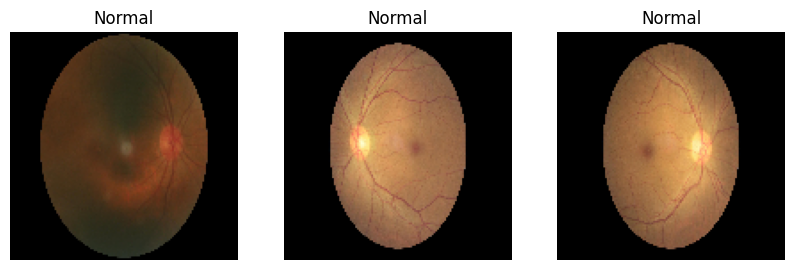

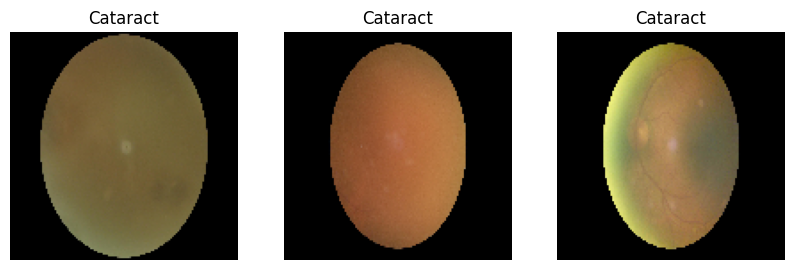

In [10]:
def plot_samples(X, y, label, title, n=3):
    idx = np.where(y == label)[0][:n]
    plt.figure(figsize=(10, 4))
    for i, id in enumerate(idx):
        plt.subplot(1, n, i+1)
        plt.imshow(X[id])
        plt.title(title)
        plt.axis("off")
    plt.show()

plot_samples(X_data, y_data, 0, "Normal")
plot_samples(X_data, y_data, 1, "Cataract")


In [12]:
save_folder = r"D:\SEMESTER 7\PRAKTIKUM PEMBELAJARAN MESIN\UAP ML\data\dataset_labeled"

for cls in CLASSES:
    os.makedirs(os.path.join(save_folder, cls), exist_ok=True)

for i, (img, label) in enumerate(zip(X_data, y_data)):
    label_name = CLASSES[int(label)]
    filename = f"{label_name.lower()}_{i+1:05d}.jpg"
    save_path = os.path.join(save_folder, label_name, filename)
    cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

print("✅ Dataset berlabel berhasil disimpan")
print("📂 Lokasi:", save_folder)


✅ Dataset berlabel berhasil disimpan
📂 Lokasi: D:\SEMESTER 7\PRAKTIKUM PEMBELAJARAN MESIN\UAP ML\data\dataset_labeled


In [13]:
X_data = X_data.astype("float32") / 255.0

print("Pixel range:", X_data.min(), "-", X_data.max())


Pixel range: 0.0 - 1.0


In [14]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_data)
print("🎨 Data augmentation configured")


🎨 Data augmentation configured


In [15]:
X_cataract = X_data[y_data == 1]
y_cataract = y_data[y_data == 1]

aug_X, aug_y = [], []

for X_batch, y_batch in datagen.flow(X_cataract, y_cataract, batch_size=32):
    aug_X.extend(X_batch)
    aug_y.extend(y_batch)
    if len(aug_X) >= len(X_cataract) * 3:
        break

X_final = np.concatenate([X_data, np.array(aug_X)])
y_final = np.concatenate([y_data, np.array(aug_y)])

print("📊 Setelah augmentasi:")
print("Normal:", np.sum(y_final == 0))
print("Cataract:", np.sum(y_final == 1))
print("Total:", len(X_final))


📊 Setelah augmentasi:
Normal: 3098
Cataract: 1252
Total: 4350


In [ ]:
np.save("X_preprocessed.npy", X_final)
np.save("y_preprocessed.npy", y_final)

print("💾 Dataset preprocessing disimpan (.npy)")

💾 Dataset preprocessing disimpan (.npy)
